In [100]:
# Stock Prediction using LSTM

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error

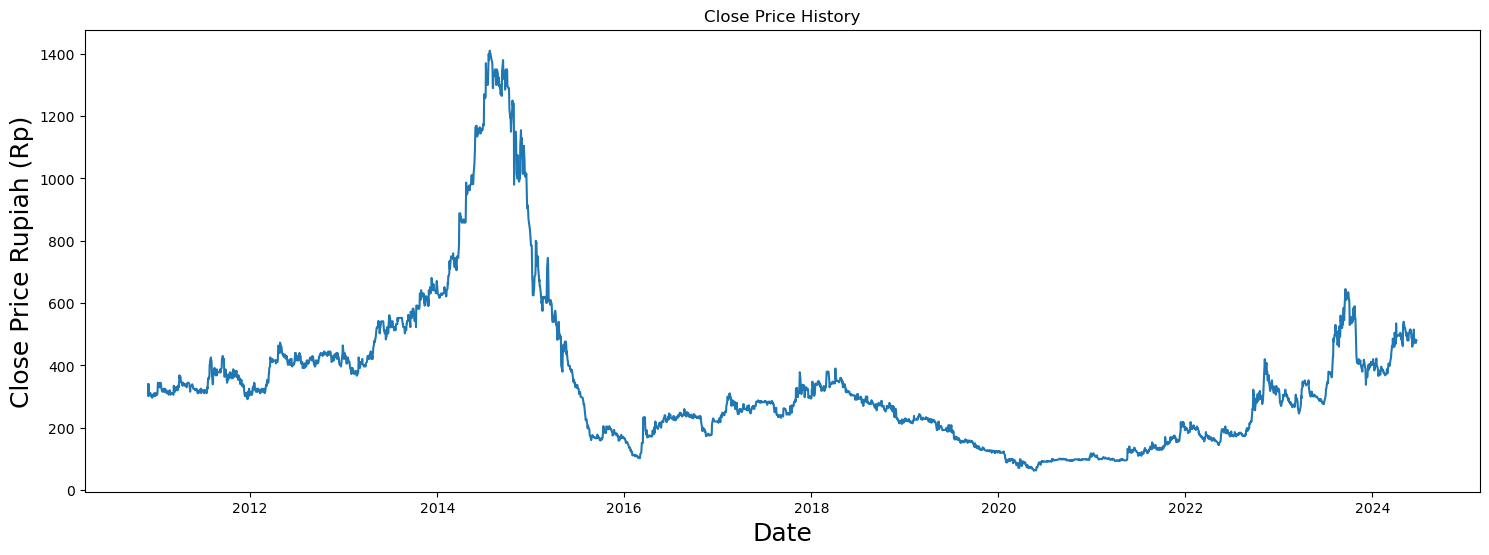

In [101]:
# Get the stock data
stock = yf.Ticker("WINS.JK")
df = stock.history(period="15y")
df = df[['Close']]
df = df.dropna()

# Plot the stock data
plt.figure(figsize=(18, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.show()

In [102]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [103]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [104]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [122]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 25)           2700      
                                                                 
 lstm_19 (LSTM)              (None, 25)                5100      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

2576/2576 [==============================] - 122s 46ms/step - loss: 9.9594e-04


In [125]:
# Create the testing data set
test_data = scaled_data[training_data_len - 100:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [126]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 18ms/step


In [127]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('RMSE:', rmse)

RMSE: 14.4448826309455


C:\Users\Galan\AppData\Local\Temp\ipykernel_17812\3252780068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


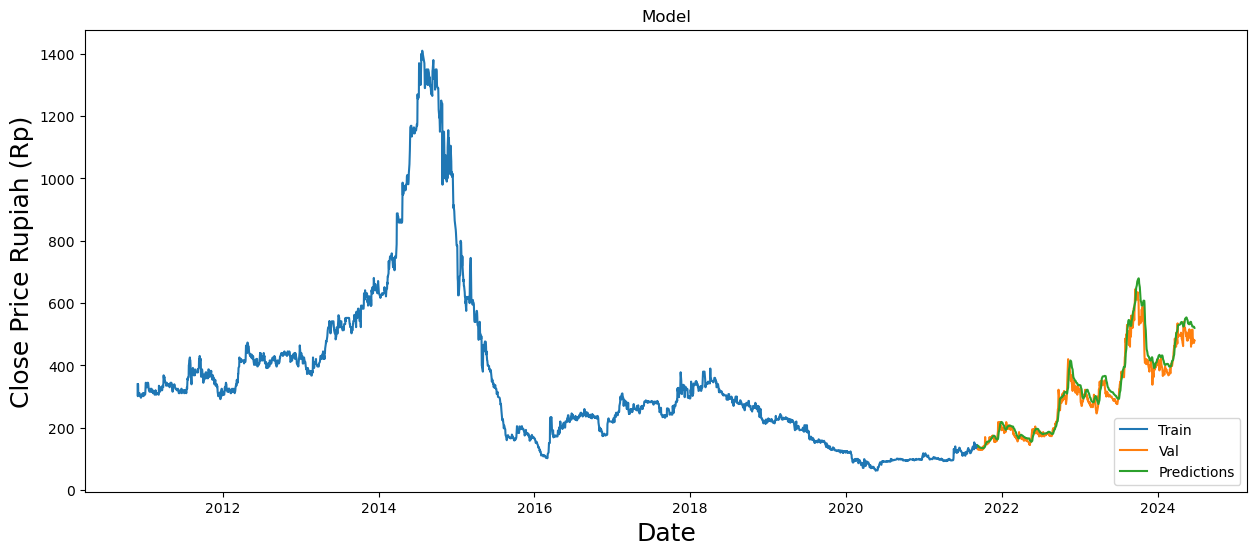

In [128]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(15, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [129]:
# Show the valid and predicted prices
print(valid)

                           Close  Predictions
Date                                         
2021-09-10 00:00:00+07:00  131.0   142.311111
2021-09-13 00:00:00+07:00  129.0   141.232712
2021-09-14 00:00:00+07:00  135.0   139.801086
2021-09-15 00:00:00+07:00  133.0   138.754883
2021-09-16 00:00:00+07:00  135.0   137.851105
...                          ...          ...
2024-06-13 00:00:00+07:00  486.0   524.851562
2024-06-14 00:00:00+07:00  484.0   524.538330
2024-06-19 00:00:00+07:00  472.0   523.896667
2024-06-20 00:00:00+07:00  482.0   521.967102
2024-06-21 00:00:00+07:00  480.0   520.448547

[669 rows x 2 columns]


In [136]:
future_predictions.append(model.predict(np.array([last_100_days.reshape(1, -1, 1)])))


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 4. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential_9/lstm_18/PartitionedCall]] [Op:__inference_predict_function_191566]